# Measurement Demo

**Companion notebook for:** [`measurement.md`](./measurement.md)

This notebook demonstrates:
- Why measurement is destructive
- Statevector vs measurement outcomes
- The deferred measurement principle
- Why measuring early kills algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

np.set_printoptions(precision=3, suppress=True)

## 1. Measurement Destroys Phase

Before measurement: full quantum state with phase.  
After measurement: classical bit (0 or 1).

Before measurement:
  Statevector: [0.707+0.j 0.707+0.j]
  This contains phase information.

After measurement:
  Counts: {'0': 497, '1': 503}
  Phase information is GONE.
  We only know probabilities now.


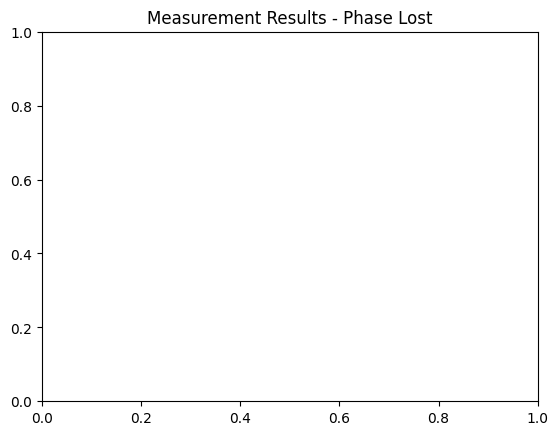

In [2]:
# Create superposition state
qc = QuantumCircuit(1, 1)
qc.h(0)  # |+⟩ = (|0⟩ + |1⟩)/√2

# Before measurement - we can see the full state
state_before = Statevector(qc)
print("Before measurement:")
print(f"  Statevector: {state_before.data}")
print(f"  This contains phase information.")

# After measurement - we only see classical outcomes
qc.measure(0, 0)
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend), shots=1000)
counts = job.result().get_counts()

print("\nAfter measurement:")
print(f"  Counts: {counts}")
print(f"  Phase information is GONE.")
print(f"  We only know probabilities now.")

# Visualize
plot_histogram(counts)
plt.title('Measurement Results - Phase Lost')
plt.show()

## 2. Same Probabilities, Different States

Measurements can't distinguish between states that differ only in phase.

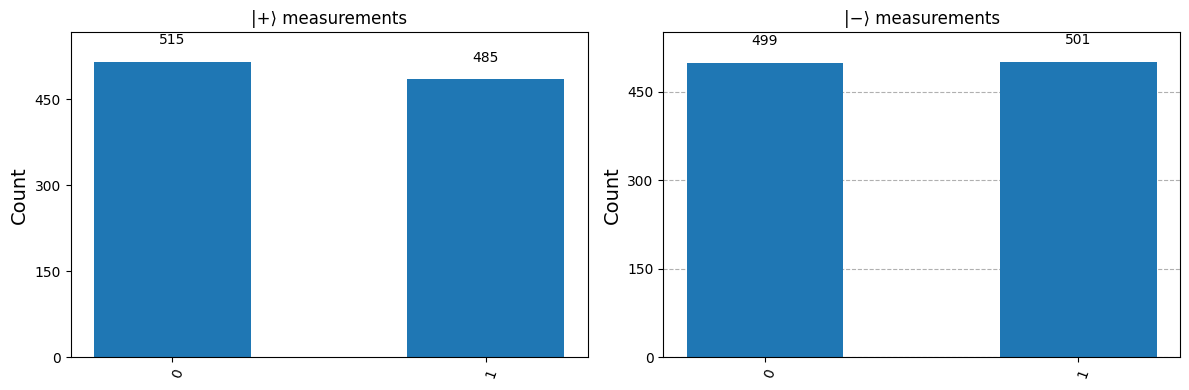

Both show ~50/50 distribution!
Measurement cannot see the phase difference.
But if we applied more gates, the difference would matter.


In [3]:
# Two different states with same probabilities
qc_plus = QuantumCircuit(1, 1)
qc_plus.h(0)  # |+⟩
qc_plus.measure(0, 0)

qc_minus = QuantumCircuit(1, 1)
qc_minus.h(0)
qc_minus.z(0)  # |−⟩
qc_minus.measure(0, 0)

# Simulate both
shots = 1000
job_plus = backend.run(transpile(qc_plus, backend), shots=shots)
job_minus = backend.run(transpile(qc_minus, backend), shots=shots)

counts_plus = job_plus.result().get_counts()
counts_minus = job_minus.result().get_counts()

# Compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_histogram(counts_plus, ax=ax1)
plot_histogram(counts_minus, ax=ax2)
ax1.set_title('|+⟩ measurements')
ax2.set_title('|−⟩ measurements')
plt.tight_layout()
plt.show()

print("Both show ~50/50 distribution!")
print("Measurement cannot see the phase difference.")
print("But if we applied more gates, the difference would matter.")

## 3. Why Measuring Early Breaks Algorithms

Let's see what happens when we measure in the middle of a circuit.

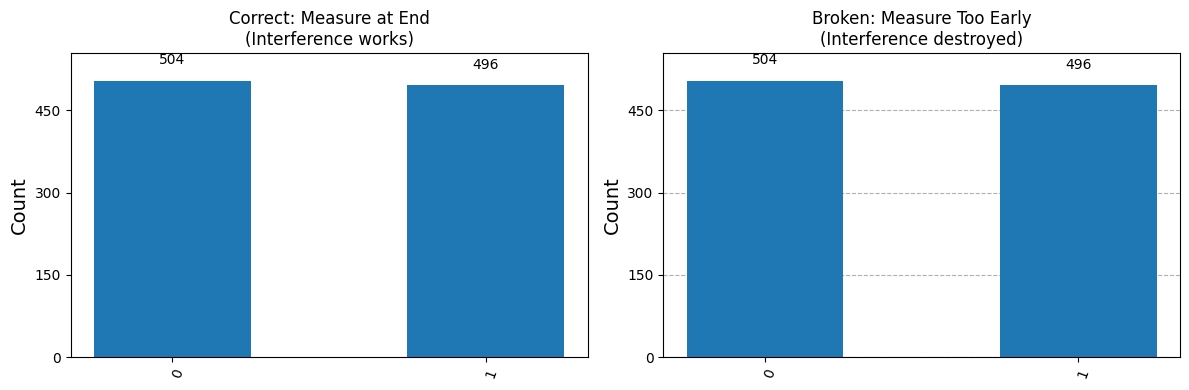

Good circuit:   {'0': 504, '1': 496}
Broken circuit: {'1': 496, '0': 504}

→ Measuring early killed the quantum behavior!


In [4]:
# Circuit WITHOUT mid-circuit measurement
qc_good = QuantumCircuit(1, 1)
qc_good.h(0)     # Create superposition
qc_good.s(0)     # Apply phase
qc_good.h(0)     # Interference happens here
qc_good.measure(0, 0)

# Circuit WITH mid-circuit measurement (BROKEN)
qc_broken = QuantumCircuit(1, 1)
qc_broken.h(0)   # Create superposition
qc_broken.measure(0, 0)  # Measure too early!
qc_broken.s(0)   # This acts on a classical bit now
qc_broken.h(0)   # This also acts classically

# Run both
job_good = backend.run(transpile(qc_good, backend), shots=1000)
job_broken = backend.run(transpile(qc_broken, backend), shots=1000)

counts_good = job_good.result().get_counts()
counts_broken = job_broken.result().get_counts()

# Compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_histogram(counts_good, ax=ax1)
plot_histogram(counts_broken, ax=ax2)
ax1.set_title('Correct: Measure at End\n(Interference works)')
ax2.set_title('Broken: Measure Too Early\n(Interference destroyed)')
plt.tight_layout()
plt.show()

print("Good circuit:  ", counts_good)
print("Broken circuit:", counts_broken)
print("\n→ Measuring early killed the quantum behavior!")

## 4. The Deferred Measurement Principle

As long as you can delay measurement, you should.

In [ ]:
# Example circuit that benefits from deferred measurement
qc = QuantumCircuit(1, 1)
qc.h(0)      # Superposition
qc.t(0)      # Phase rotation
qc.h(0)      # Let interference happen
# ... more gates could go here ...
qc.measure(0, 0)  # Measure only at the very end

print("Circuit structure:")
print(qc.draw(output='text'))
print("\nThis is the correct pattern:")
print("  1. Prepare state")
print("  2. Apply quantum operations")
print("  3. Let interference work")
print("  4. Measure ONCE at the end")

Circuit structure:
     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ T ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 

This is the correct pattern:
  1. Prepare state
  2. Apply quantum operations
  3. Let interference work
  4. Measure ONCE at the end


: 

## Summary

From this notebook, you should understand:

1. **Measurement destroys phase** — you lose quantum information
2. **Measurements show probabilities only** — phase is invisible
3. **Early measurement breaks algorithms** — interference needs coherence
4. **Defer measurement** — measure only at the end

This is why the repository's README says:  
_"Run the notebooks only after the idea makes sense."_

**Next:** [Tensor Products](../03-multiple-qubits/tensor-products.ipynb)  
Where one qubit becomes many, and intuition starts to wobble.